# Gradient Descent Exercise

This notebook provides the skeleton required to implement a gradient descent algorithm that learns the parameters of a linear regression task. First, we will generate some noisy, linear data to fit a model. Note that $y=\theta_0 + \theta_1 x_1$ with $\theta_0=1.5, \theta_1=0.8$ represents the true model that we want to learn. Note that $x_0=1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# m, the nuber of instances
m = 500

X = 2.*np.random.rand(m,1) # random number between 0 and 2
y = 1.5 + 0.8*X + np.random.rand(m,1)

# We assume a bias term of x_0 = 1. Use np.ones(shape) to create an array of 1s and stack "in front" of X
X_withbias = np.c_[np.ones((m,1)), X]

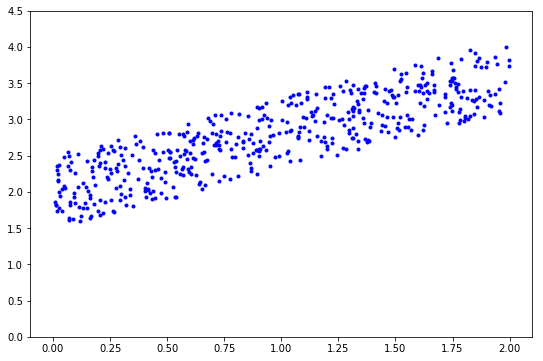

In [3]:
# Here is your training data set!
fig1 = plt.figure(num=1, figsize=(9,6))
plt.scatter(X,y,c='blue',marker='.')
plt.axis([-0.1,2.1,0,4.5])
plt.show()

In [4]:
# Implement gradient descent here!
def gradient_descent(X, y, n_params, alpha, tolerance):
    # We want the first index of X.shape
    num_instances = X.shape[0]
    
    print(len(X))
    # We are computing gradients for the parmeters, theta. We need to intialize a guess for them.
    # Leverage numpy's random number generator to make an array. This will be an nx1 array.
    theta = np.random.randn(n_params, 1)
    print(theta.shape)
    # Bonus: let's store these thetas over time to see how they evolve in parameter space
    thetas = []
    
    # Compute an intial gradient. Remember it computes the gradient with the whole data set.
    dJdtheta = (2.0 / num_instances) * X.T.dot(X.dot(theta) - y)
    # Bonus: store the value of norm(dJdtheta) to visualize the "descent"
    grad_norms = []
    
    # Iterate until we meet the specified tolerance value. Use the norm of dJdtheta.
    while np.linalg.norm(dJdtheta) > tolerance:
        dJdtheta = (2.0 / num_instances) * X.T.dot(X.dot(theta) - y)
        grad_norms.append(np.linalg.norm(dJdtheta))
        
        theta = theta - alpha*dJdtheta
        thetas.append(theta)
        
    return thetas, grad_norms

In [5]:
# Run your gradient_descent algorithm on the supplied training data and labels, y.
# Play with your learning rate and tolerance values. Does it "learn" a model?

thetas, grads = gradient_descent(X_withbias,y,2,0.01,0.001)

500
(2, 1)


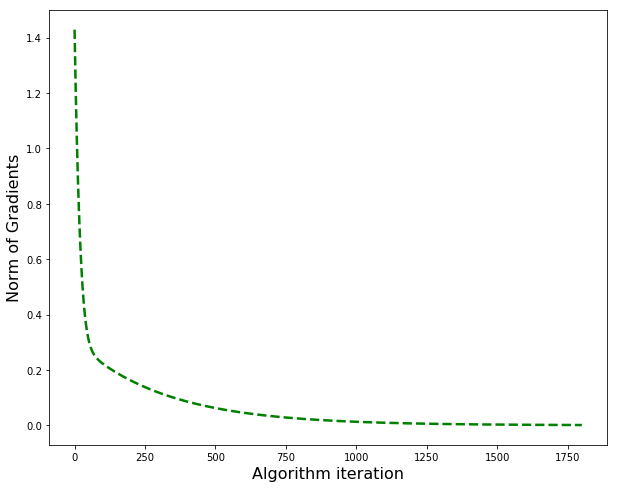

In [6]:
# Plot the gradients versus algorithm step
fig = plt.figure(num=1, figsize=(10,8))
plt.plot(range(0,len(grads)), grads, 'g--', linewidth=2.5)
plt.xlabel("Algorithm iteration", fontsize=16)
plt.ylabel("Norm of Gradients", fontsize=16)
plt.show()

Final Parameters = (2.008870845407574,0.7954938948744956)


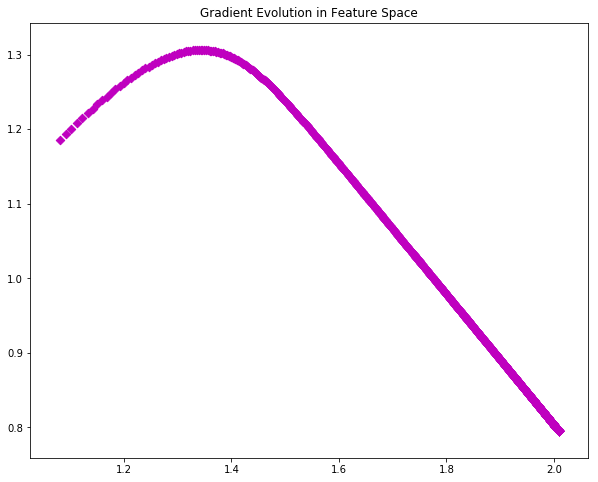

In [7]:
# Illustration of the parameters evolving in their space. First turn into an ndarray
all_thetas = np.asarray(thetas).T[0]
print("Final Parameters = ({0},{1})".format(all_thetas[0][-1], all_thetas[1][-1]))
fig2 = plt.figure(num=2, figsize=(10,8))
plt.title('Gradient Evolution in Feature Space')
plt.scatter(all_thetas[0], all_thetas[1], c='m', marker='D')
plt.show()

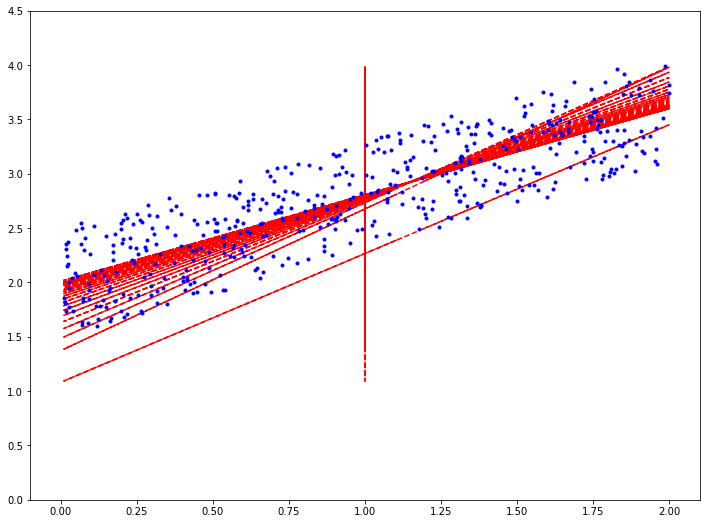

In [8]:
# And finally, here is an illustration of the linear fit evolving during the duration of the algorithm over time
fig3 = plt.figure(num=3, figsize=(12,9))
for i in range(0, len(all_thetas[0])):
    curr_theta = thetas[i]
    curr_y = X_withbias.dot(curr_theta)
    if i % 50 == 0:
        plt.plot(X_withbias, curr_y, "r--")
        
plt.plot(X,y, 'b.')
plt.axis([-0.1,2.1,0,4.5])
plt.show()